In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
'''
from zipfile import ZipFile
zip = ZipFile('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data.zip')
zip.extractall('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/')
'''

"\nfrom zipfile import ZipFile\nzip = ZipFile('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data.zip')\nzip.extractall('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/')\n"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bangalore_data = pd.read_csv("/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/zomato.csv")

In [ ]:
bangalore_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# data cleaning and preproccesing

In [ ]:
bangalore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
bang_data=bangalore_data.drop(['url','dish_liked','phone'],axis=1) 

In [ ]:
bang_data.shape

(51717, 14)

In [ ]:
bang_data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
print(bang_data.duplicated().sum())
bang_data.drop_duplicates(inplace=True)

43


In [ ]:
#Remove the null values from the dataset
bang_data.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [ ]:
bang_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#data cleanign from Rates
bang_data = bang_data.loc[bang_data.rate !='NEW']
bang_data = bang_data.loc[bang_data.rate !='-'].reset_index(drop=True)
rmv_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
bang_data.rate = bang_data.rate.apply(rmv_slash).str.strip().astype('float')
bang_data['rate'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
bang_data['rate'].fillna(bang_data['rate'].mean(), inplace = True)
bang_data['rate'].isnull().sum()

0

In [ ]:
bang_data["rate"] = bang_data["rate"].apply(lambda x: format(float(x),".2f")).str.strip().astype('float')

In [ ]:
bang_data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
#Remove the NaN values from the dataset
bang_data.dropna(how='any',inplace=True)
bang_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48844 entries, 0 to 49404
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      48844 non-null  object 
 1   name                         48844 non-null  object 
 2   online_order                 48844 non-null  object 
 3   book_table                   48844 non-null  object 
 4   rate                         48844 non-null  float64
 5   votes                        48844 non-null  int64  
 6   location                     48844 non-null  object 
 7   rest_type                    48844 non-null  object 
 8   cuisines                     48844 non-null  object 
 9   approx_cost(for two people)  48844 non-null  object 
 10  reviews_list                 48844 non-null  object 
 11  menu_item                    48844 non-null  object 
 12  listed_in(type)              48844 non-null  object 
 13  listed_in(city) 

In [ ]:
bang_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
#  Columns Names
bang_data = bang_data.rename(columns={'approx_cost(for two people)':'avg_cost2','listed_in(type)':'type','listed_in(city)':'city'})
bang_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
bang_data['avg_cost2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [ ]:
bang_data['avg_cost2'] = bang_data['avg_cost2'].astype(str)
bang_data['avg_cost2'] = bang_data['avg_cost2'].apply(lambda x: x.replace(',','.'))
bang_data['avg_cost2'] = bang_data['avg_cost2'].astype(float)
bang_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48844 entries, 0 to 49404
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       48844 non-null  object 
 1   name          48844 non-null  object 
 2   online_order  48844 non-null  object 
 3   book_table    48844 non-null  object 
 4   rate          48844 non-null  float64
 5   votes         48844 non-null  int64  
 6   location      48844 non-null  object 
 7   rest_type     48844 non-null  object 
 8   cuisines      48844 non-null  object 
 9   avg_cost2     48844 non-null  float64
 10  reviews_list  48844 non-null  object 
 11  menu_item     48844 non-null  object 
 12  type          48844 non-null  object 
 13  city          48844 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.6+ MB


In [ ]:
bang_data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
bang_data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# converting objects to boolean
bang_data['online_order'].replace(('Yes','No'),(True, False),inplace=True)
bang_data['book_table'].replace(('Yes','No'),(True, False),inplace=True)

In [ ]:
bang_data['online_order'].unique()

array([ True, False])

In [ ]:
print(bang_data.shape)
bang_data.info()

(48844, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48844 entries, 0 to 49404
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       48844 non-null  object 
 1   name          48844 non-null  object 
 2   online_order  48844 non-null  bool   
 3   book_table    48844 non-null  bool   
 4   rate          48844 non-null  float64
 5   votes         48844 non-null  int64  
 6   location      48844 non-null  object 
 7   rest_type     48844 non-null  object 
 8   cuisines      48844 non-null  object 
 9   avg_cost2     48844 non-null  float64
 10  reviews_list  48844 non-null  object 
 11  menu_item     48844 non-null  object 
 12  type          48844 non-null  object 
 13  city          48844 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(9)
memory usage: 4.9+ MB


# data is cleaned, lets move to visualization



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


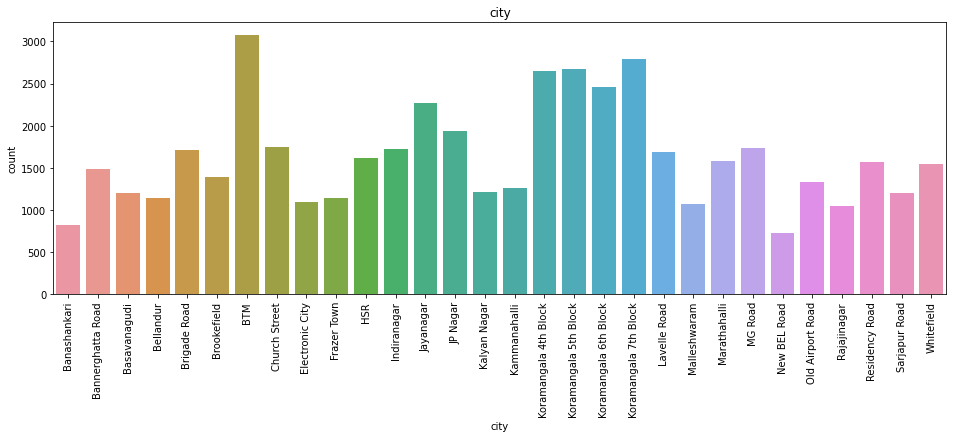

In [ ]:
# city
plt.figure(figsize = (16,5))
sns.countplot(bang_data['city'])
plt.xticks(rotation=90)
plt.title('city')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


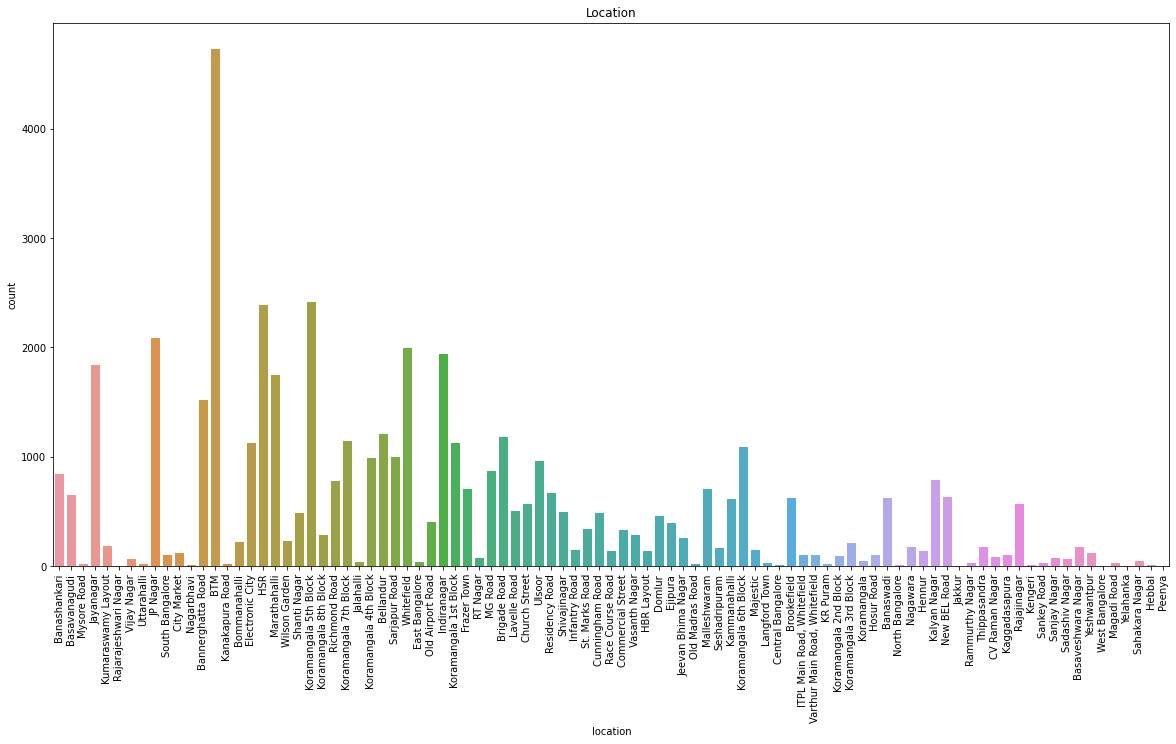

In [ ]:
# Location
plt.figure(figsize = (20,10))
sns.countplot(bang_data['location'])
plt.xticks(rotation=90)
plt.title('Location')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


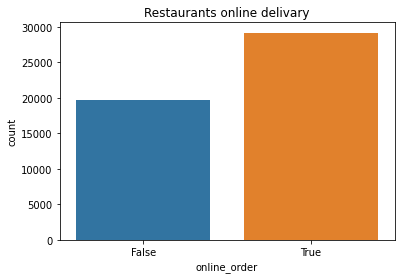

In [ ]:
#Restaurants delivering Online or not
sns.countplot(bang_data['online_order'])
plt.title('Restaurants online delivary')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


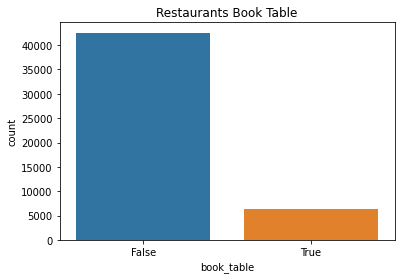

In [ ]:
#Restaurants booking reservation or not
sns.countplot(bang_data['book_table'])
plt.title('Restaurants Book Table')
plt.show()

In [ ]:
bang_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

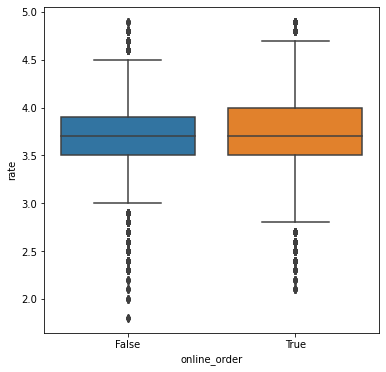

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = bang_data)

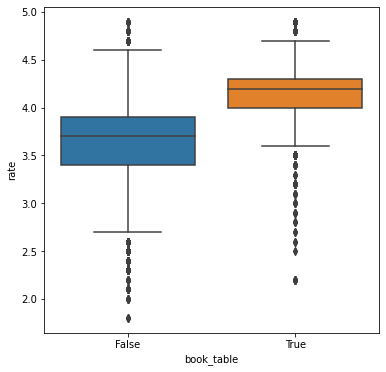

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = bang_data)

In [ ]:
on_order = bang_data.groupby(['location','online_order'])['name'].count().reset_index()
on_order = pd.pivot_table(on_order, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
on_order

name      
online_order      False  True
location                     
BTM                1603  3128
Banashankari        362   481
Banaswadi           289   337
Bannerghatta Road   641   882
Basavanagudi        219   432
...                 ...   ...
West Bangalore        2     2
Whitefield          937  1061
Wilson Garden        98   132
Yelahanka             0     5
Yeshwantpur          26    93

[93 rows x 2 columns]

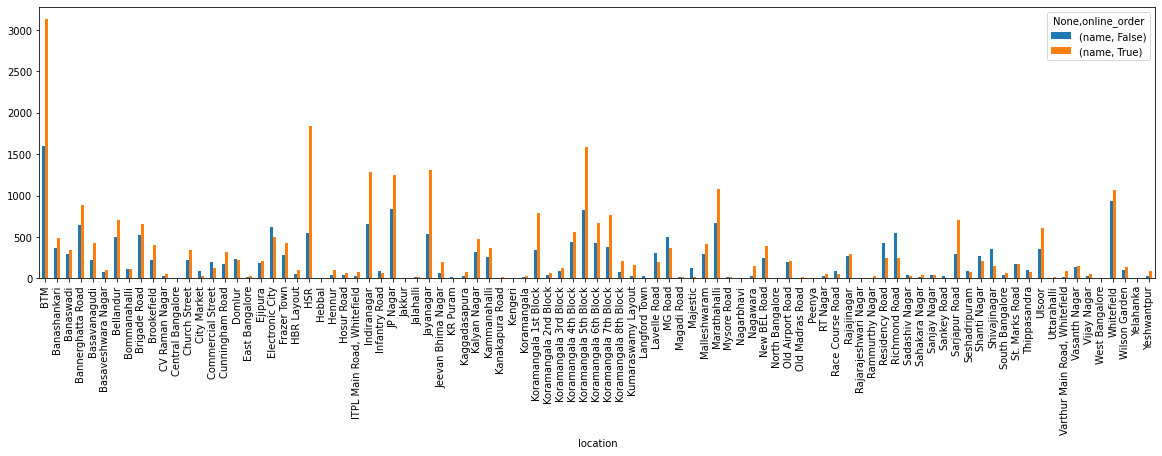

In [ ]:
on_order.plot(kind = 'bar', figsize = (20,5))

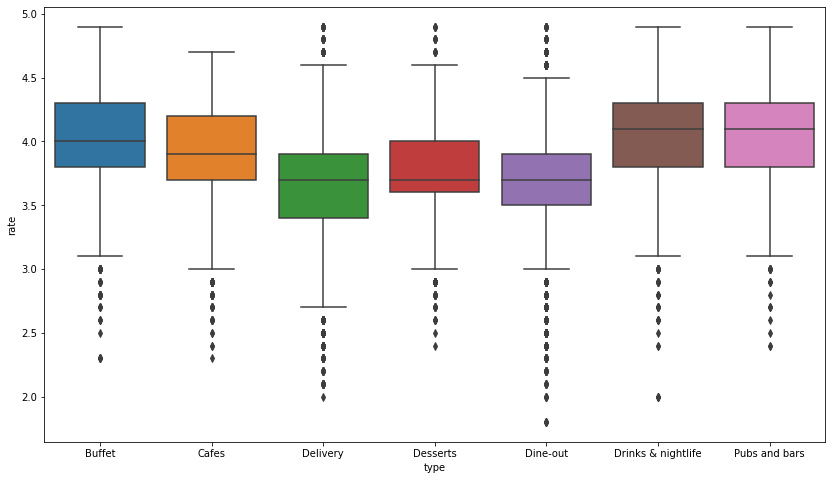

In [ ]:
# type vs rate
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'type', y = 'rate', data = bang_data)

In [ ]:
# location vise distribution
typeOfRes = bang_data.groupby(['location','type'])['name'].count().reset_index()
typeOfRes = pd.pivot_table(typeOfRes, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
typeOfRes

name                                                      \
type              Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                   18    80     2858      196     1541                 22   
Banashankari           7    36      386       66      334                 14   
Banaswadi              0    24      301       37      257                  6   
Bannerghatta Road      9    42      785      131      545                  9   
Basavanagudi           7    11      334       63      231                  5   
...                  ...   ...      ...      ...      ...                ...   
West Bangalore         0     0        4        0        0                  0   
Whitefield            27    48      983      126      734                 47   
Wilson Garden          3     0      127       16       81                  2   
Yelahanka              0     0        3        0        2                  0   
Yeshwantpur            1     0       88        3       25                  1   

                                 
type              Pubs and bars  
location                         
BTM                          16  
Banashankari                  0  
Banaswadi                     1  
Bannerghatta Road             2  
Basavanagudi                  0  
...                         ...  
West Bangalore                0  
Whitefield                   33  
Wilson Garden                 1  
Yelahanka                     0  
Yeshwantpur                   1  

[93 rows x 7 columns]

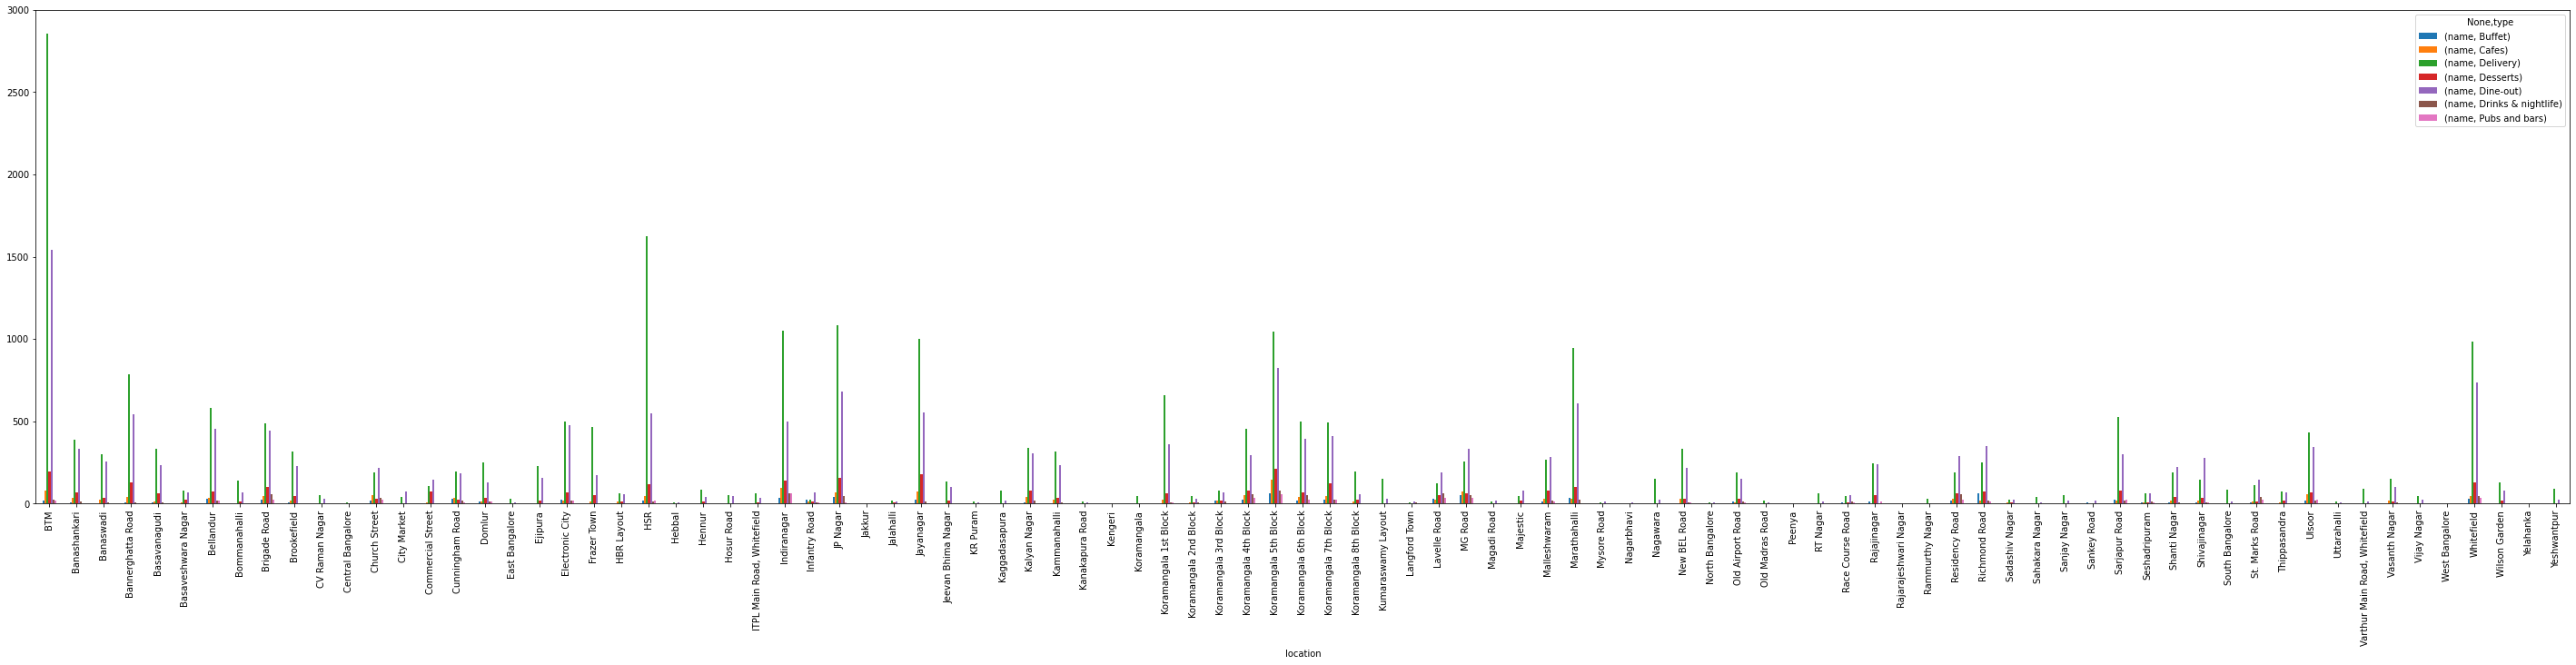

In [ ]:
typeOfRes.plot(kind = 'bar', figsize=(50,10))
plt.savefig('/content/gdrive/MyDrive/in_Proj/figures/typeOfRest.png', bbox_inches='tight')

In [ ]:
!pip install squarify
import squarify 

In [ ]:
topCuisines = bang_data['cuisines'].value_counts().reset_index().rename(columns = {'index':'cuisines', 'cuisines':'count'})
topCuisines

,cuisines,count
0,North Indian,2721
1,"North Indian, Chinese",2271
2,South Indian,1734
3,Biryani,873
4,"Bakery, Desserts",869
...,...,...
2606,"North Indian, Mughlai, Lucknowi",1
2607,"Continental, Thai, North Indian, Chinese",1
2608,"North Indian, Bengali, Chinese, Beverages",1
2609,"North Indian, South Indian, Biryani, Fast Food",1


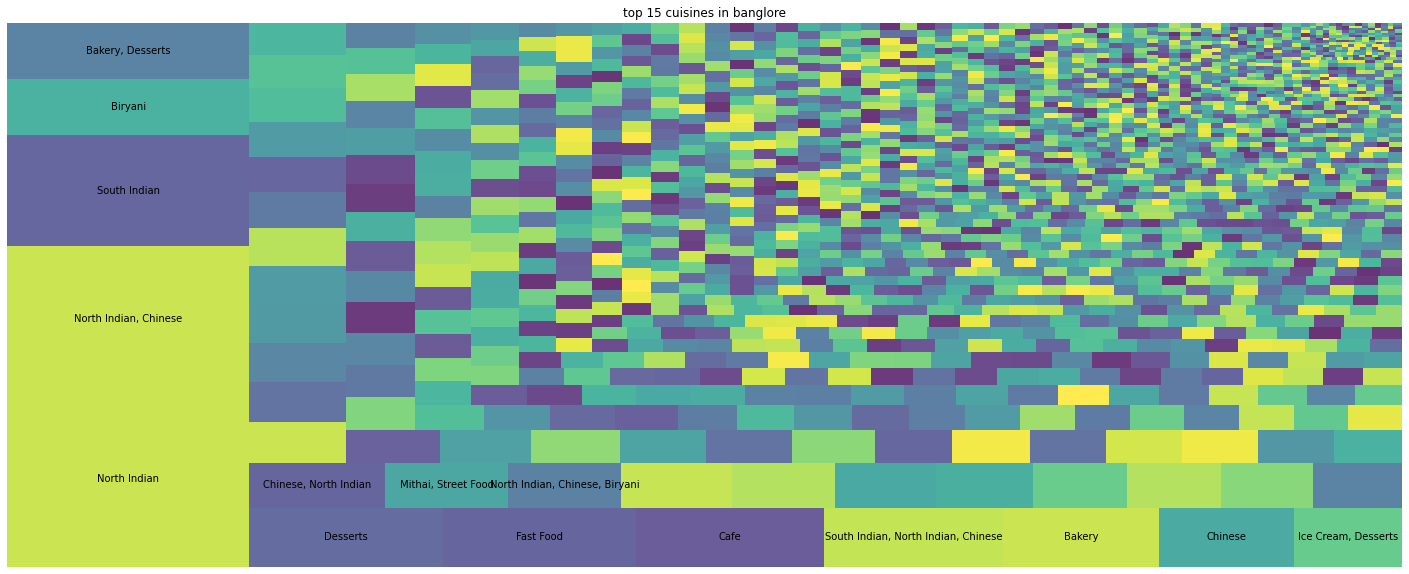

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(25, 10)
squarify.plot(sizes=topCuisines['count'],label=topCuisines['cuisines'][:15], alpha=.8 )
plt.axis('off')
plt.title('top 15 cuisines in banglore')
plt.savefig('/content/gdrive/MyDrive/in_Proj/figures/top15.png', bbox_inches='tight')
plt.show()

In [ ]:
top10cuisines= topCuisines[:10]
tmplist = top10cuisines['cuisines'].tolist() 
rest_cusines_df = bang_data.set_index('cuisines')
rest_cusines_df = rest_cusines_df.loc[tmplist].reset_index()
rest_cusines_df.shape

(11934, 14)

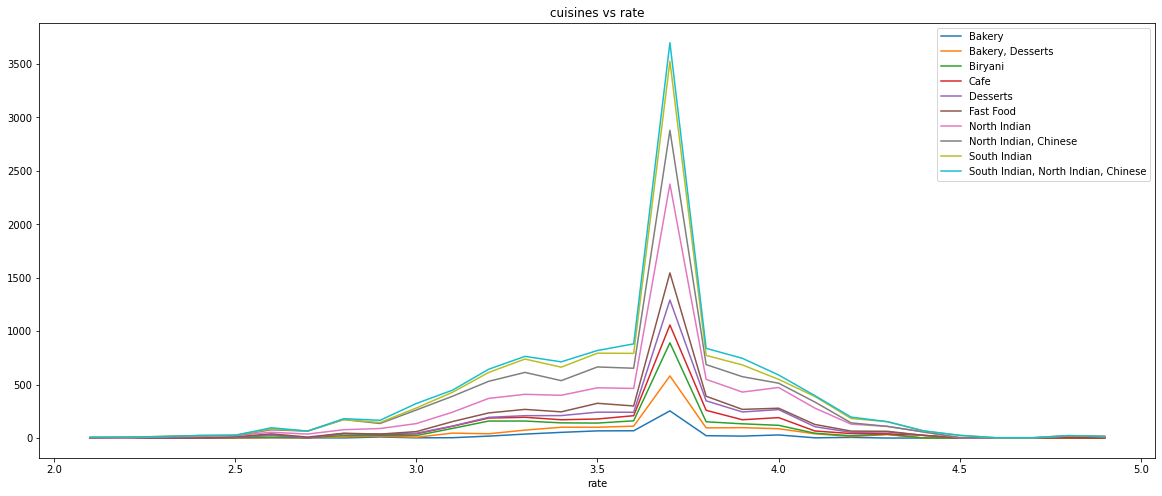

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
restTypeVsRate = pd.crosstab(rest_cusines_df['rate'], rest_cusines_df['cuisines'])
restTypeVsRate.plot(kind = 'line', stacked = True)
plt.title('cuisines vs rate')
plt.legend(loc='upper right')
plt.show()

In [ ]:
bang_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
typeRest = bang_data['rest_type'].value_counts().reset_index().rename(columns = {'index':'type', 'rest_type':'count'})
top10restType = typeRest[:10]
top10restType

,type,count
0,Quick Bites,17905
1,Casual Dining,10002
2,Cafe,3563
3,Delivery,2465
4,Dessert Parlor,2170
5,"Takeaway, Delivery",1834
6,"Casual Dining, Bar",1105
7,Bakery,1069
8,Beverage Shop,802
9,Bar,676


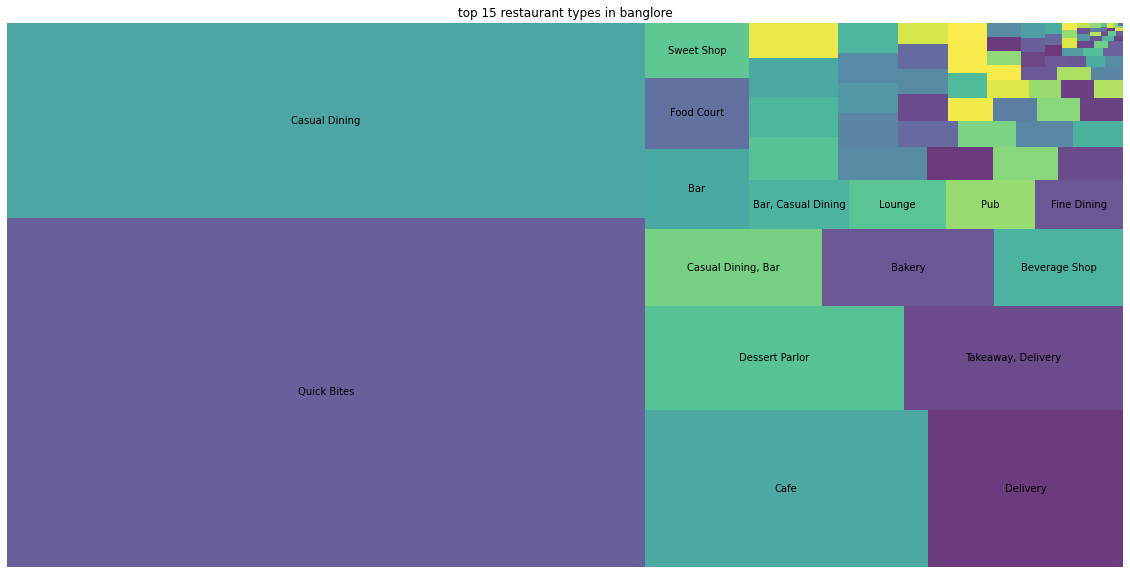

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 10)
squarify.plot(sizes=typeRest['count'],label=typeRest['type'][:16], alpha=.8 )
plt.axis('off')
plt.title('top 15 restaurant types in banglore')
plt.show()

In [ ]:
tmplist = top10restType['type'].tolist() 
rest_type_df = bang_data.set_index('rest_type')
rest_type_df = rest_type_df.loc[tmplist].reset_index()
rest_type_df.shape

(41591, 14)

In [ ]:
bins = np.arange(1,5,0.2) 

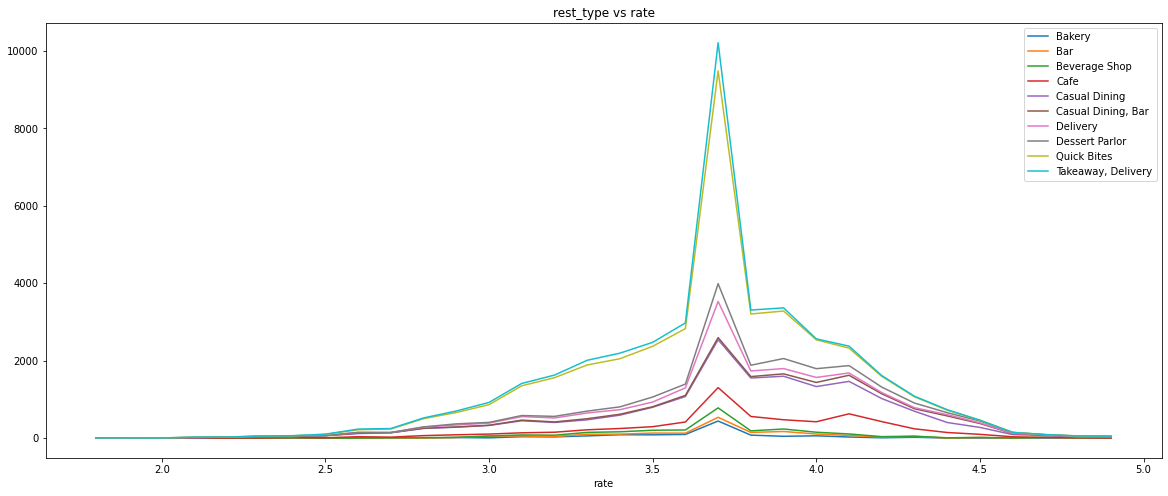

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
restTypeVsRate = pd.crosstab(rest_type_df['rate'], rest_type_df['rest_type'])
restTypeVsRate.plot(kind = 'line', stacked = True)
plt.title('rest_type vs rate')
plt.legend(loc='upper right')
plt.show()

quick bites and takeaway,delivary has more rating than others

most oF type rest type has rating between 3.5 to 4

there are small number of restaurants which has rating more than 4 and 

rest_type is beveraged and bar

In [ ]:
bang_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

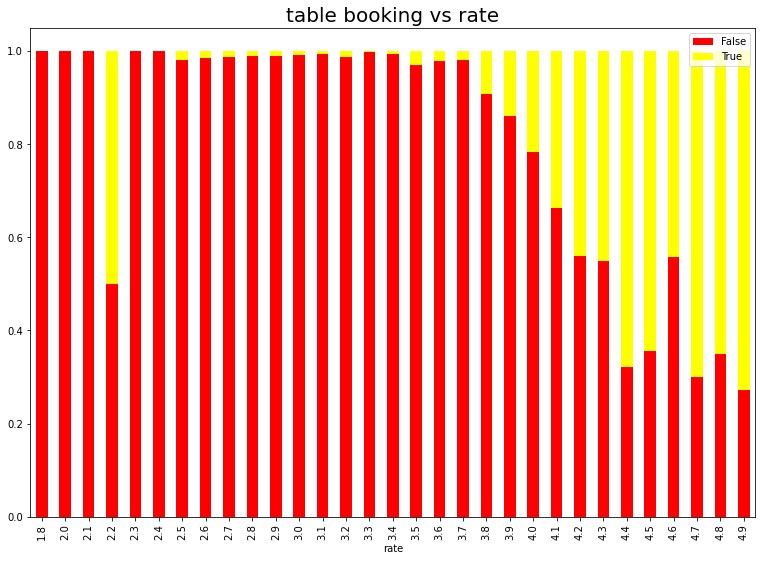

In [ ]:
#Table booking vs Rate
plt.rcParams['figure.figsize'] = (13, 9)
bookingVsRate = pd.crosstab(bang_data['rate'], bang_data['book_table'])
bookingVsRate2 =bookingVsRate.div(bookingVsRate.sum(1).astype(float), axis = 0)
bookingVsRate2.plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

rating is higher for those restaurants which has table booking facelities.

In [ ]:
bang_data['rate'].describe()

count    48844.000000
mean         3.701714
std          0.404319
min          1.800000
25%          3.500000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [ ]:
rat_count = bang_data.groupby('rate').size().reset_index().rename(columns = 
                                                                  {0:'rating_count'})
rat_count.sort_values(by = 'rate', ascending= False)[:10]

,rate,rating_count
30,4.9,55
29,4.8,66
28,4.7,167
27,4.6,300
26,4.5,656
25,4.4,1146
24,4.3,1682
23,4.2,2154
22,4.1,2925
21,4.0,3144


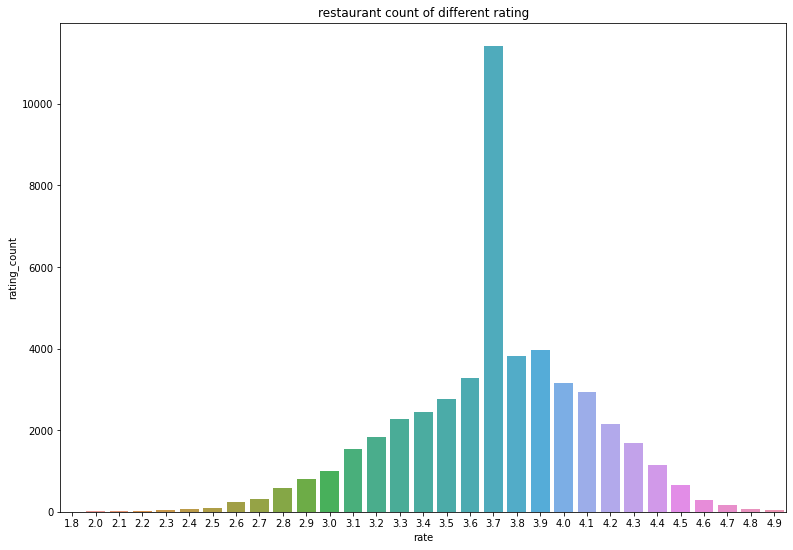

In [ ]:
sns.barplot(x = rat_count['rate'], y = rat_count['rating_count'])
plt.title('restaurant count of different rating')
plt.xlabel('rate')
plt.show()

more tahn 11000 rest has rate of 3.7 followed by 3.9,3.8.
most of the restaurants have ratings between 3.2, 4.4

In [ ]:
qul_rest_bang = bang_data[bang_data['rate'] == 4.9]
qul_rest_bang = qul_rest_bang.groupby('city').size().reset_index()
qul_rest_bang.head()

,city,0
0,BTM,7
1,Bellandur,3
2,Brigade Road,2
3,Brookefield,3
4,Church Street,2


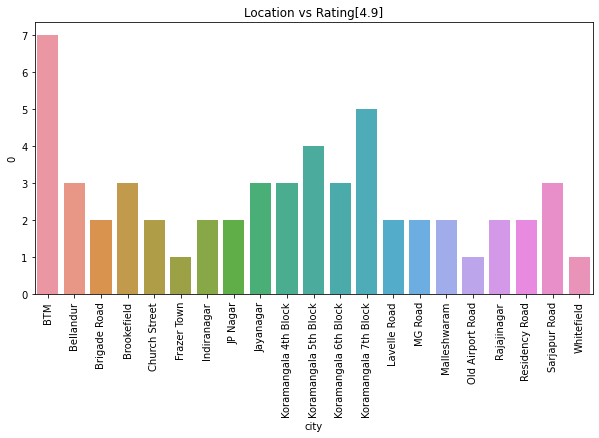

In [ ]:
# location vs rating
plt.figure(figsize=(10,5))
sns.barplot(x = qul_rest_bang['city'], y = qul_rest_bang[0])
plt.title('Location vs Rating[4.9]')
plt.xticks(rotation = 90)
plt.show()

BTM has high quality restaurants followed by koramangala blocks, sarjapur, brookefield. 

In [ ]:
bang_data['type'].value_counts()

Delivery              24416
Dine-out              16809
Desserts               3419
Cafes                  1625
Drinks & nightlife     1063
Buffet                  852
Pubs and bars           660
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


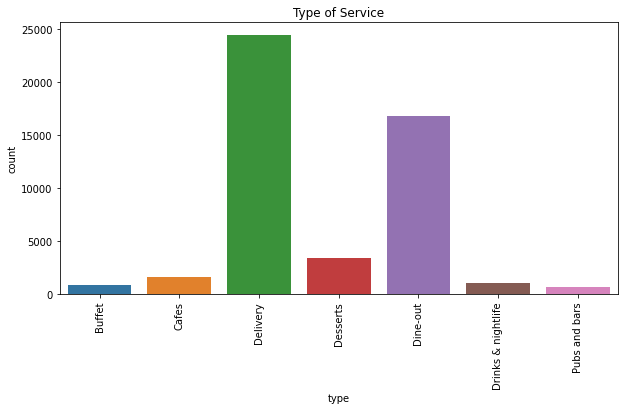

In [ ]:
#Types of Services
plt.figure(figsize=(10,5))
sns.countplot(bang_data['type'])
plt.xticks(rotation=90)
plt.title('Type of Service')
plt.show()

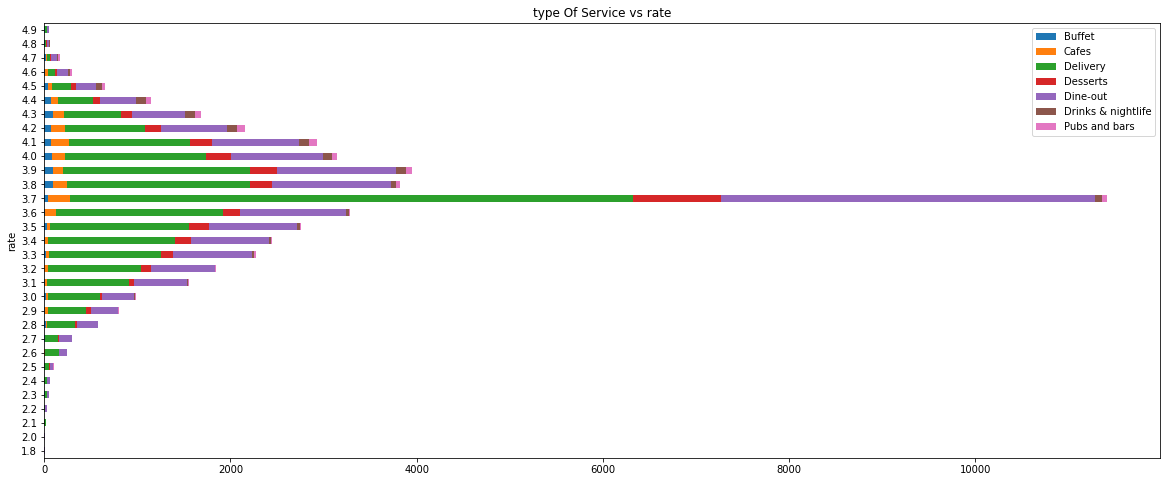

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
typeSerVsRate = pd.crosstab(bang_data['rate'], bang_data['type'])
typeSerVsRate.plot(kind = 'barh', stacked = True)
plt.title('type Of Service vs rate')
plt.legend(loc='upper right')
plt.show()

In [ ]:
bang_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


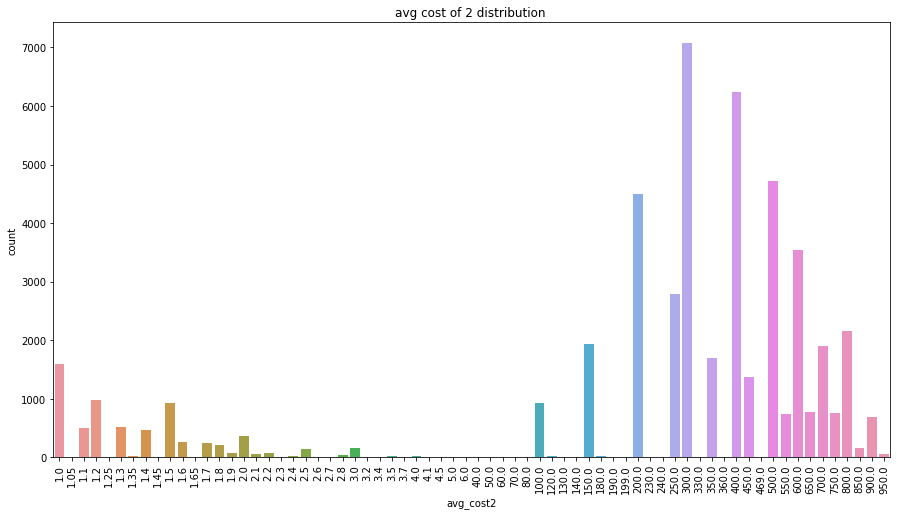

In [ ]:
#Types of Services
plt.figure(figsize=(15,8))
sns.countplot(bang_data['avg_cost2'])
plt.xticks(rotation=90)
plt.title('avg cost of 2 distribution ')
plt.show()

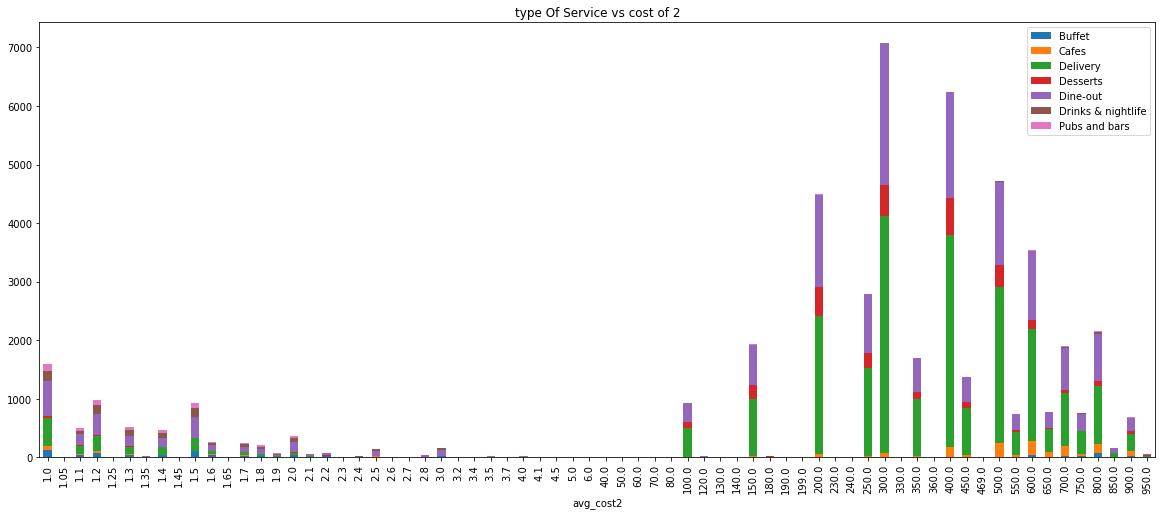

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
costVSType = pd.crosstab(bang_data['avg_cost2'], bang_data['type'])
costVSType.plot(kind = 'bar', stacked = True)
plt.title('type Of Service vs cost of 2')
plt.legend(loc='upper right')
plt.show()

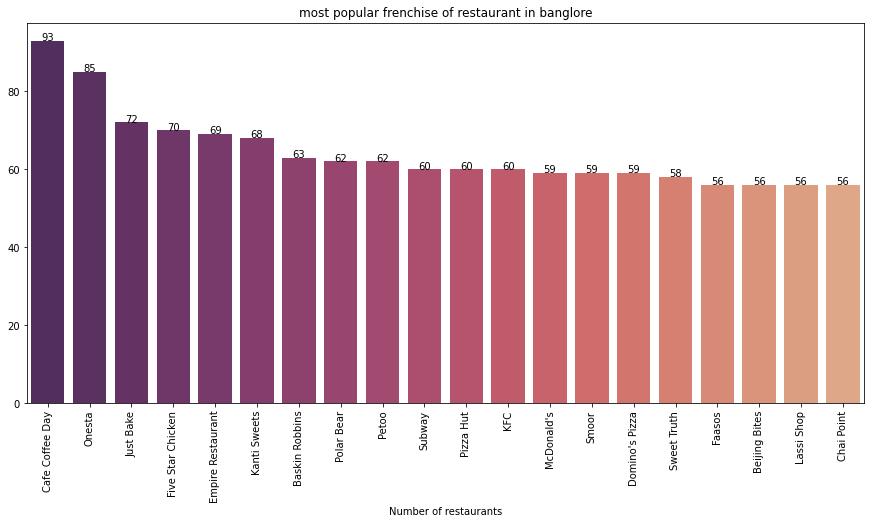

In [ ]:
# most popular frenchise of restaurant in banglor
plt.figure(figsize=(15,7))
frenchise = bang_data['name'].value_counts()[:20]
labels = frenchise.index
values = frenchise.values
ax = sns.barplot(x=labels,y=values,palette='flare_r')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")
plt.title("most popular frenchise of restaurant in banglore")
plt.xlabel("Number of restaurants")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
frenchise

Cafe Coffee Day      93
Onesta               85
Just Bake            72
Five Star Chicken    70
Empire Restaurant    69
Kanti Sweets         68
Baskin Robbins       63
Polar Bear           62
Petoo                62
Subway               60
Pizza Hut            60
KFC                  60
McDonald's           59
Smoor                59
Domino's Pizza       59
Sweet Truth          58
Faasos               56
Beijing Bites        56
Lassi Shop           56
Chai Point           56
Name: name, dtype: int64

In [ ]:
bang_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

# restaurant recommendation system

In [ ]:
# zomato_bang = bangalore_data.copy()

In [ ]:
# zomato_bang.to_csv('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/zomato_bang.csv', index =False)

In [ ]:
zomato_bang = pd.read_csv('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/zomato_bang.csv')
zomato_bang.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
zomato_bang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
zomato_bang=zomato_bang.drop(['url','dish_liked','phone'],axis=1)

In [ ]:
zomato_bang.duplicated().sum()
zomato_bang.drop_duplicates(inplace=True)

In [ ]:
#Remove the NaN values from the dataset
zomato_bang.isnull().sum()
zomato_bang.dropna(how='any',inplace=True)
zomato_bang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [ ]:
zomato_bang.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
zomato_bang = zomato_bang.rename(columns={'approx_cost(for two people)':'avg_cost2',
                                          'listed_in(type)':'type',
                                          'listed_in(city)':'city'})
zomato_bang.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
zomato_bang['avg_cost2'] = zomato_bang['avg_cost2'].astype(str) #Changing the cost to string
zomato_bang['avg_cost2'] = zomato_bang['avg_cost2'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato_bang['avg_cost2'] = zomato_bang['avg_cost2'].astype(float) # Changing the cost to Float
zomato_bang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   avg_cost2     43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [ ]:
zomato_bang['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
zomato_bang = zomato_bang.loc[zomato_bang.rate !='NEW']
zomato_bang = zomato_bang.loc[zomato_bang.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato_bang.rate = zomato_bang.rate.apply(remove_slash).str.strip().astype('float')
zomato_bang['rate'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
# Adjust the column names
zomato_bang.name = zomato_bang.name.apply(lambda x:x.title())
zomato_bang.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato_bang.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato_bang.avg_cost2.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [ ]:
zomato_bang['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
zomato_bang.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
avg_cost2       0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [ ]:
## Computing Mean Rating
restaurants = list(zomato_bang['name'].unique())
zomato_bang['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato_bang['Mean Rating'][zomato_bang['name'] == restaurants[i]] = zomato_bang['rate'][zomato_bang['name'] == restaurants[i]].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
zomato_bang.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost2,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.118182
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.100000
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.800000
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.700000
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.800000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

zomato_bang[['Mean Rating']] = scaler.fit_transform(zomato_bang[['Mean Rating']]).round(2)

zomato_bang.sample(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost2,reviews_list,menu_item,type,city,Mean Rating
25660,"15, 20th Cross, Maruthi Nagar Main Road, 1st S...",Hotel Godavari,True,False,3.9,226,BTM,Casual Dining,"Andhra, Chinese, North Indian, Biryani",500.0,"[('Rated 4.0', 'RATED\n Very good location n ...","['Plate Meal', 'Carrier Meal', 'Full Meal', 'N...",Delivery,Koramangala 6th Block,3.71
13653,"Plot 146, 7th Cross, 19th Main, Near Mantri Sa...",Purani Dilli,False,False,3.2,4,HSR,Quick Bites,"North Indian, Chinese",300.0,"[('Rated 5.0', 'RATED\n Its an excellent plac...",[],Dine-out,HSR,2.81
32809,"Kalamandhar Road, Marathahalli, Bangalore",Central Cafe,True,False,3.2,4,Marathahalli,"Beverage Shop, Quick Bites","Beverages, Fast Food",300.0,"[('Rated 4.0', 'RATED\n Its a small place to...",[],Delivery,Marathahalli,2.81


## text preproccesing

In [ ]:
zomato_bang[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
11701,"[('Rated 2.0', 'RATED\n Ordered via Zomato fo...","American, Sandwich"
2018,"[('Rated 3.0', 'RATED\n Burger King is a well...","Burger, Fast Food, Beverages"
34473,"[('Rated 4.0', 'RATED\n Been to this place a ...","Italian, American, Steak, Continental, BBQ, Salad"
16007,"[('Rated 2.0', ""RATED\n The food is not good ...","North Indian, Chinese, Fast Food"
33777,"[('Rated 4.0', 'RATED\n This is a small place...","Seafood, South Indian, North Indian, Mangalore..."


In [ ]:
## Lower Casing
zomato_bang["reviews_list"] = zomato_bang["reviews_list"].str.lower()
zomato_bang[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
29036,"[('rated 4.0', 'rated\n i chose to sit at the...",Healthy Food
8477,"[('rated 1.0', 'rated\n absolute disaster, th...",North Indian
19358,"[('rated 1.0', 'rated\n nothing great and exp...","Ice Cream, Desserts, Bakery"
7137,"[('rated 1.0', 'rated\n lassi cafe is a fake ...","Beverages, Ice Cream"
13470,"[('rated 3.0', ""rated\n nice place to eat out...","Cafe, Fast Food, North Indian"


In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato_bang["reviews_list"] = zomato_bang["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato_bang[['reviews_list', 'cuisines']].sample(5)  

,reviews_list,cuisines
32270,rated 40 ratedn place to be for corporate par...,"Modern Indian, Continental, North Indian"
13896,rated 30 ratedn tried their chicken biryani t...,"Andhra, Biryani, South Indian"
34777,rated 40 ratedn faasos has come up with a nav...,"North Indian, Biryani, Fast Food"
19909,rated 30 ratedn a quick take away tried the ...,Arabian
27878,rated 40 ratedn i have visited as well ordere...,North Indian


In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato_bang["reviews_list"] = zomato_bang["reviews_list"].apply(lambda text: remove_stopwords(text))

In [ ]:
## Removal of URLS
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato_bang["reviews_list"] = zomato_bang["reviews_list"].apply(lambda text: remove_urls(text))

In [ ]:
zomato_bang[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
30697,rated 50 ratedn become one favourite coffee pl...,Cafe
18719,rated 40 ratedn ordered special chicken thali ...,"North Indian, Chinese, Fast Food"
14328,rated 25 ratedn went place lazer castleas hung...,"Cafe, Italian, Tex-Mex, Fast Food, Burger"
7452,rated 40 ratedn awesomd post movie treat right...,"Fast Food, Beverages"
34490,rated 30 ratedn went date many reviews recomme...,"Cafe, Continental, American, Desserts"


In [ ]:
# RESTAURANT NAMES:
uniq_rest = list(zomato_bang['name'].unique())
uniq_rest[:5]

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

In [ ]:
zomato_bang.shape

(41237, 15)

In [ ]:
zomato_bang.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'avg_cost2', 'reviews_list',
       'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [ ]:
zomato_bang=zomato_bang.drop(['address','rest_type', 'type', 'menu_item'],axis=1)

In [ ]:
import pandas

# Randomly sample 50% of your dataframe
div_data = zomato_bang.sample(frac=0.5)

In [ ]:
div_data.to_csv('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/div_data.csv', index= False)

In [ ]:
div_data = pd.read_csv('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/div_data.csv')

In [ ]:
div_data.shape

(20618, 11)

In [ ]:
div_data['name'].value_counts()

Smoor                            41
Cafe Coffee Day                  41
Onesta                           41
Mcdonald'S                       35
Five Star Chicken                35
                                 ..
Paper Cup Cafe                    1
The Big Barbeque                  1
Halli Mane Mudde Oota             1
Sri Venkateshwara Sweet House     1
Kotae Garden                      1
Name: name, Length: 5724, dtype: int64

In [ ]:
div_data.set_index('name', inplace=True)

In [ ]:
indices = pd.Series(div_data.index)

In [ ]:
type(list(indices.unique()))

list

In [ ]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(div_data['reviews_list'])

In [ ]:
print(type(tfidf_matrix))
tfidf_matrix.shape

<class 'scipy.sparse.csr.csr_matrix'>


(20618, 1368819)

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf_matrix, open("/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/tfidf.pkl","wb"))

In [ ]:
tfidf_matrix = pickle.load(open("/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/tfidf.pkl","rb"))

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
print(type(cosine_similarities))
cosine_similarities.shape

<class 'numpy.ndarray'>


(20618, 20618)

In [ ]:
from numpy import asarray
from numpy import save, load
# save to npy file
save('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/cosine.npy', cosine_similarities)

In [ ]:
cosine_similarities = np.load('/content/gdrive/MyDrive/in_Proj/zomato_banglor/data/cosine.npy')

In [ ]:
def rest_recommend(name, cosine_similarities = cosine_similarities):
    
    recommended_restaurant = []
    
    idx = indices[indices == name].index[0]
    
    score = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    top30_score = list(score.iloc[0:31].index)
   
    for each in top30_score:
        recommended_restaurant.append(list(div_data.index)[each])
   
    similar_rest_df = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'avg_cost2'])
    
    for each in recommended_restaurant:
        similar_rest_df = similar_rest_df.append(pd.DataFrame(div_data[['cuisines','Mean Rating', 'avg_cost2']][div_data.index == each].sample()))
    
    similar_rest_df = similar_rest_df.drop_duplicates(subset=['cuisines','Mean Rating', 'avg_cost2'], keep=False)
    similar_rest_df = similar_rest_df.sort_values(by='Mean Rating', ascending=False).head(10).reset_index().rename(columns={'index':'rest_name'})
    
    restaurants_names = similar_rest_df['rest_name'].tolist()

    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(similar_rest_df)), name))
    
    return restaurants_names

In [ ]:
div_data[div_data.index == 'Jalsa'].head()

,online_order,book_table,rate,votes,location,cuisines,avg_cost2,reviews_list,city,Mean Rating
name,,,,,,,,,,
Jalsa,True,True,4.1,783,Banashankari,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Jayanagar,3.99
Jalsa,True,True,4.1,783,Banashankari,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Jayanagar,3.99
Jalsa,True,True,4.1,783,Banashankari,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Jayanagar,3.99
Jalsa,True,True,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Banashankari,3.99
Jalsa,True,True,4.2,2173,Marathahalli,"North Indian, Mughlai",1.5,rated 40 ratedn pretty decent place eat mughal...,Brookefield,3.99


In [ ]:
rest_recommend('Jalsa')

TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


['Asia Kitchen By Mainland China',
 'Byg Brewski Brewing Company',
 'Flechazo',
 "Ab'S - Absolute Barbecues",
 'The Black Pearl',
 'Communiti',
 'Brew And Barbeque - A Microbrewery Pub',
 'The Pallet',
 'Deja Vu Resto Bar',
 'Barbecoa']